# Global Power Plant Database
Importing necessary Libraries

In [197]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [198]:
# Reading the csv file from dataset
df = pd.read_csv("database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [200]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [201]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [202]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


In [203]:
df.drop(["other_fuel1", "other_fuel2", "other_fuel3", "owner", "wepp_id","generation_data_source", "estimated_generation_gwh"], axis=1, inplace=True)

In [204]:
df.shape

(907, 20)

In [205]:
df.nunique()

country                    1
country_long               1
name                     907
gppd_idnr                907
capacity_mw              361
latitude                 836
longitude                827
primary_fuel               8
commissioning_year        73
source                   191
url                      304
geolocation_source         3
year_of_capacity_data      1
generation_gwh_2013        0
generation_gwh_2014      371
generation_gwh_2015      396
generation_gwh_2016      403
generation_gwh_2017      408
generation_gwh_2018      410
generation_gwh_2019        0
dtype: int64

In [206]:
df.drop(['country','country_long','year_of_capacity_data','generation_gwh_2013','name','gppd_idnr','url','generation_gwh_2019'], axis=1, inplace=True)


In [207]:
df.shape

(907, 12)

In [208]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,WRI,NaN,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN


In [209]:
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)

In [210]:

df.fillna(df.median()[0], inplace=True)

In [211]:

df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

# Exploratory Data Analysis(EDA)

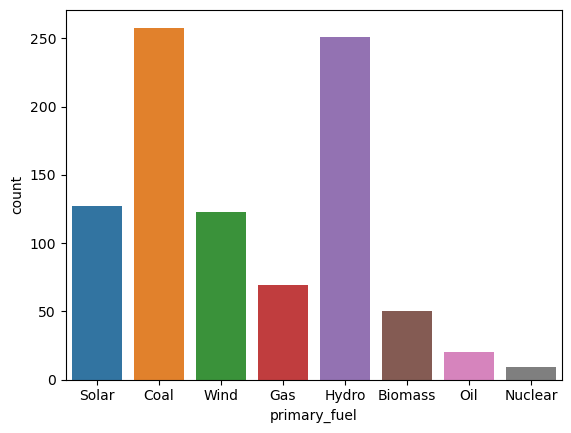

In [212]:
sns.countplot(x ='primary_fuel',data = df)
plt.show()

<Axes: xlabel='generation_gwh_2014', ylabel='capacity_mw'>

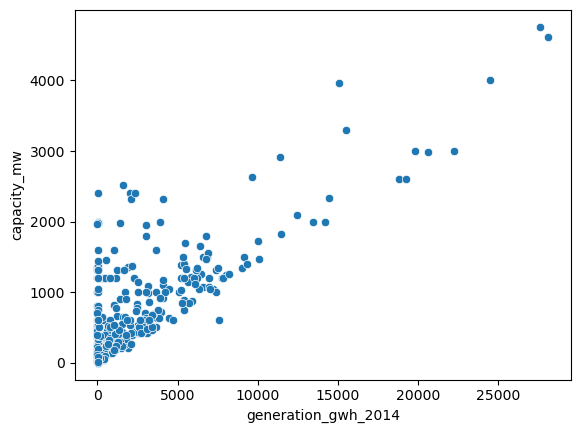

In [213]:
sns.scatterplot(x='generation_gwh_2014',y='capacity_mw', data = df)

<Axes: xlabel='generation_gwh_2015', ylabel='capacity_mw'>

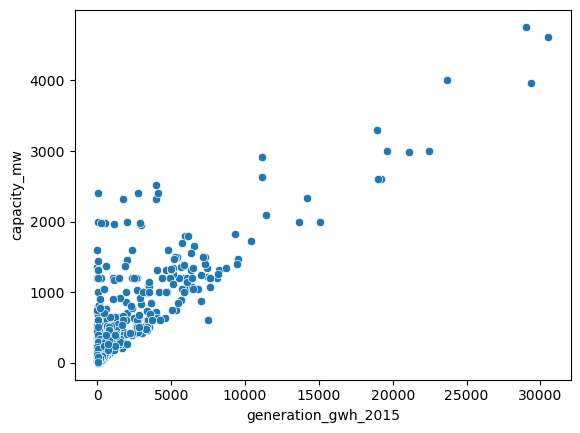

In [214]:
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw', data = df)

<Axes: xlabel='generation_gwh_2016', ylabel='capacity_mw'>

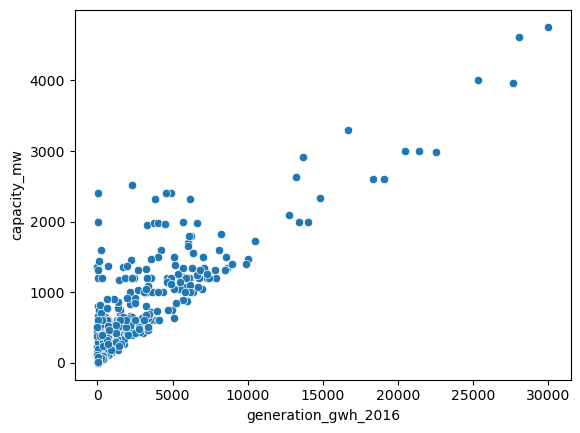

In [215]:
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw', data = df)

<Axes: xlabel='generation_gwh_2017', ylabel='capacity_mw'>

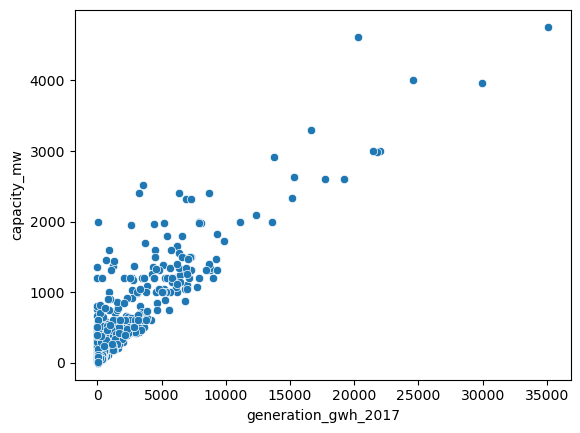

In [216]:
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw', data = df)

<Axes: xlabel='generation_gwh_2018', ylabel='capacity_mw'>

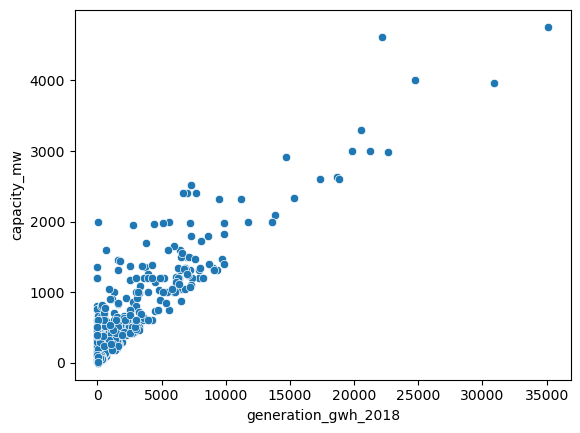

In [217]:
sns.scatterplot(x='generation_gwh_2018',y='capacity_mw', data = df)

<Axes: xlabel='commissioning_year', ylabel='capacity_mw'>

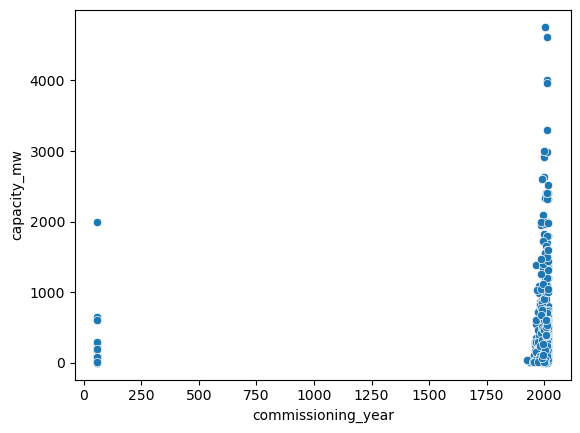

In [218]:
sns.scatterplot(x='commissioning_year',y='capacity_mw', data = df)

<Axes: xlabel='latitude', ylabel='capacity_mw'>

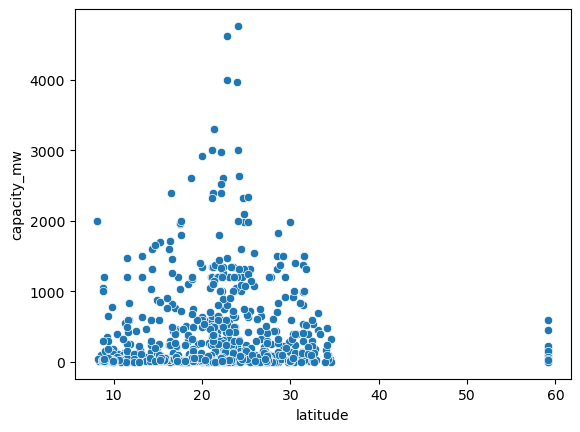

In [219]:
sns.scatterplot(x='latitude',y='capacity_mw',data=df)

<Axes: xlabel='commissioning_year', ylabel='primary_fuel'>

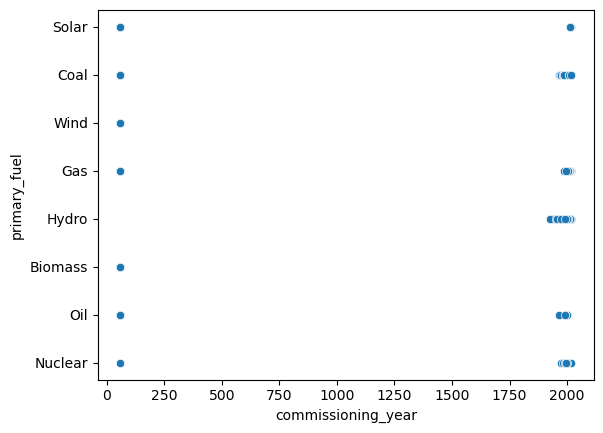

In [220]:
sns.scatterplot(x='commissioning_year',y='primary_fuel',data=df)

<Axes: xlabel='generation_gwh_2018', ylabel='primary_fuel'>

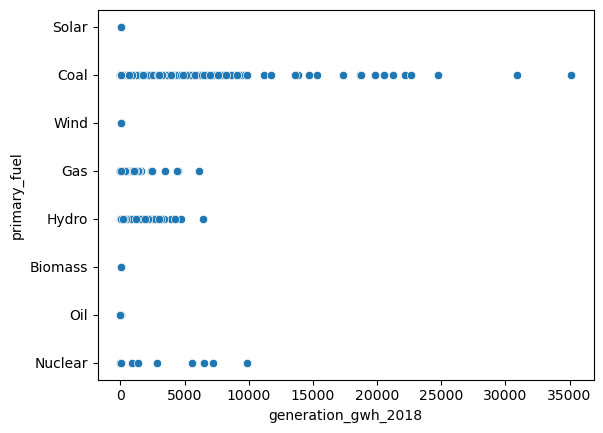

In [221]:
sns.scatterplot(x='generation_gwh_2018',y='primary_fuel',data=df)

<Axes: >

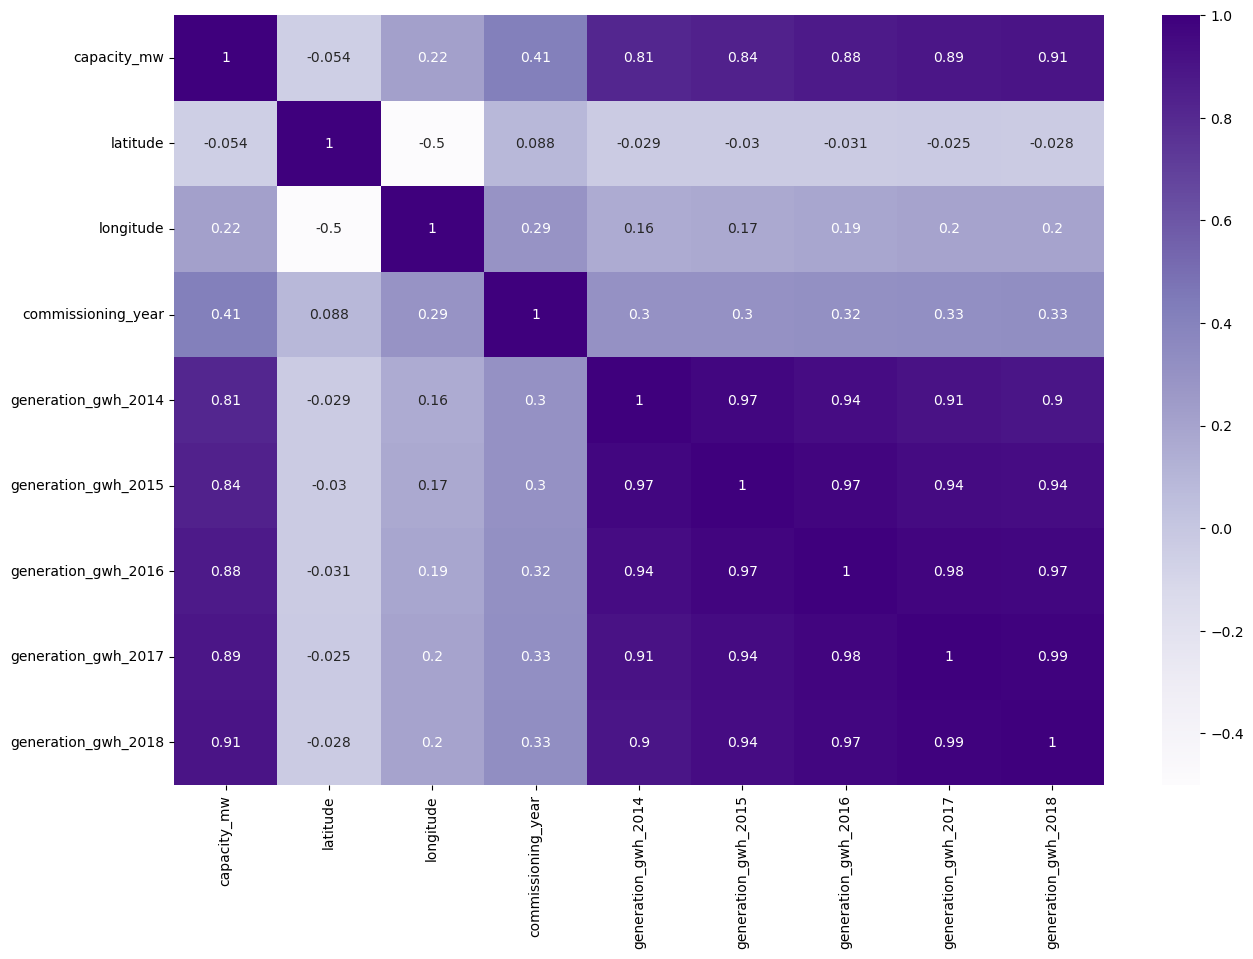

In [222]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='Purples',annot=True)

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    object 
 6   geolocation_source   907 non-null    object 
 7   generation_gwh_2014  907 non-null    float64
 8   generation_gwh_2015  907 non-null    float64
 9   generation_gwh_2016  907 non-null    float64
 10  generation_gwh_2017  907 non-null    float64
 11  generation_gwh_2018  907 non-null    float64
dtypes: float64(9), object(3)
memory usage: 85.2+ KB


In [224]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [225]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

In [226]:

from sklearn.preprocessing import LabelEncoder

In [227]:
encoder = LabelEncoder()
df['primary_fuel'] = encoder.fit_transform(df['primary_fuel'])
df['geolocation_source'] = encoder.fit_transform(df['geolocation_source'])
df['source'] = encoder.fit_transform(df['source'])

In [228]:
df['geolocation_source'].unique()

array([1, 2, 0])

In [229]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    int32  
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    int32  
 6   geolocation_source   907 non-null    int32  
 7   generation_gwh_2014  907 non-null    float64
 8   generation_gwh_2015  907 non-null    float64
 9   generation_gwh_2016  907 non-null    float64
 10  generation_gwh_2017  907 non-null    float64
 11  generation_gwh_2018  907 non-null    float64
dtypes: float64(9), int32(3)
memory usage: 74.5 KB


# Z-Score

In [230]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.548908,0.490314,0.526774,1.225688,0.863621,1.460215,1.083349,0.357473,0.356430,0.369673,0.380384,0.382173
1,0.386977,0.159060,0.308213,0.967877,1.177534,2.917019,0.394241,0.357473,0.356430,0.369673,0.380384,0.382173
2,0.486679,0.118391,1.144536,1.664401,1.177534,0.512075,0.394241,0.357473,0.356430,0.369673,0.380384,0.382173
3,0.324240,0.072301,2.367481,0.529164,0.856301,0.489662,0.394241,0.165681,0.102731,0.104488,0.189891,0.209552
4,2.498942,0.112915,0.937708,0.967877,0.867804,0.489662,0.394241,0.664461,1.537600,1.613686,1.297882,1.815722
...,...,...,...,...,...,...,...,...,...,...,...,...
902,2.159821,0.662039,0.130697,0.967877,0.868850,0.489662,0.394241,0.357473,0.375252,0.313738,0.126362,0.191207
903,0.548060,0.991752,0.259856,1.225688,1.177534,0.743019,2.560940,0.357473,0.356430,0.369673,0.380384,0.382173
904,0.509909,0.760817,0.152938,1.664401,1.177534,0.512075,0.394241,0.357473,0.356430,0.369673,0.380384,0.382173
905,0.417498,0.118710,0.445790,0.967877,1.177534,0.339596,0.394241,0.357473,0.356430,0.369673,0.380384,0.382173


In [231]:
threshold=3
print(np.where(z>3))

(array([ 14,  15,  15,  15,  15,  15,  25,  42,  45,  67,  71,  72,  80,
       143, 143, 143, 143, 143, 143, 147, 158, 178, 191, 192, 201, 208,
       209, 209, 209, 209, 209, 209, 250, 299, 308, 308, 308, 308, 308,
       308, 321, 329, 330, 332, 333, 345, 363, 364, 364, 364, 364, 364,
       364, 375, 386, 420, 422, 430, 435, 440, 466, 478, 479, 482, 482,
       483, 493, 493, 493, 493, 493, 493, 494, 494, 494, 494, 494, 494,
       502, 519, 532, 538, 540, 545, 623, 648, 648, 648, 648, 648, 648,
       655, 657, 657, 657, 657, 657, 657, 661, 669, 674, 680, 689, 695,
       695, 695, 695, 695, 695, 705, 711, 712, 721, 721, 721, 721, 721,
       724, 724, 724, 724, 724, 726, 726, 726, 726, 726, 726, 731, 732,
       741, 767, 770, 773, 774, 775, 776, 784, 786, 786, 786, 786, 786,
       786, 788, 808, 808, 808, 808, 808, 808, 828, 832, 870, 871, 879,
       880, 880, 880, 880, 880, 880, 884, 886, 895, 900], dtype=int64), array([ 1,  0,  8,  9, 10, 11,  1,  1,  1,  1,  5,  1,  5,  0, 

In [232]:

df_new=df[(z<3).all(axis=1)]

In [233]:
df.shape

(907, 12)

In [234]:
df_new.shape

(819, 12)

In [235]:
x=df.drop(['capacity_mw'],axis=1)
y=df['capacity_mw']

Splitting data

In [236]:
from sklearn.model_selection import train_test_split

In [237]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.27,random_state=95)

In [238]:
x_train.shape

(662, 11)

In [239]:
x_test.shape

(245, 11)

# Model Making

In [240]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [241]:
#Linear Regression

In [242]:
from sklearn.linear_model import LinearRegression


LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.836613868227804


In [243]:
print(mean_squared_error(LR_predict,y_test))
print(mean_absolute_error(LR_predict,y_test))
print(r2_score(LR_predict,y_test))

86011.06938573612
162.6922063682932
0.8224656753247059


In [244]:
#Ridge Regression

In [245]:
from sklearn.linear_model import Ridge

R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.8366138630394131


In [246]:
print(mean_squared_error(LR_predict,y_test))
print(mean_absolute_error(LR_predict,y_test))
print(r2_score(LR_predict,y_test))

86011.06938573612
162.6922063682932
0.8224656753247059


In [247]:
#Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.9763639365559572


In [248]:
print(mean_squared_error(LR_predict,y_test))
print(mean_absolute_error(LR_predict,y_test))
print(r2_score(LR_predict,y_test))

86011.06938573612
162.6922063682932
0.8224656753247059


In [249]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)

0.9787436485967194


In [250]:
print(mean_squared_error(LR_predict,y_test))
print(mean_absolute_error(LR_predict,y_test))
print(r2_score(LR_predict,y_test))

86011.06938573612
162.6922063682932
0.8224656753247059


In [251]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

0.9999132052755106


In [252]:
print(mean_squared_error(LR_predict,y_test))
print(mean_absolute_error(LR_predict,y_test))
print(r2_score(LR_predict,y_test))

86011.06938573612
162.6922063682932
0.8224656753247059


# Cross Validation

In [253]:
#Linear regression

from sklearn.model_selection import cross_val_score

print(cross_val_score(LR,x,y,cv=5).mean())

0.8204966948899084


In [254]:
# Random Forest Regressor

from sklearn.model_selection import cross_val_score

print(cross_val_score(RF,x,y,cv=5).mean())

0.8551883799468225


In [255]:
#Decision Tree Regressor

from sklearn.model_selection import cross_val_score

print(cross_val_score(DTR,x,y,cv=5).mean())

0.7399926311286824


In [265]:
# Ridge regression

from sklearn.model_selection import cross_val_score

print(cross_val_score(R,x,y,cv=5).mean())

0.8204971466869833
